<a href="https://colab.research.google.com/github/zarinhadika/ML/blob/main/student_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,roc_curve,roc_auc_score
from xgboost import XGBClassifier

df=pd.read_csv("/content/Student_performance_data.csv")


Accuracy :  0.9665621734587252
Precision :  0.9730061349693252
Recall :  0.987546699875467
F1 Score :  0.9802224969097652


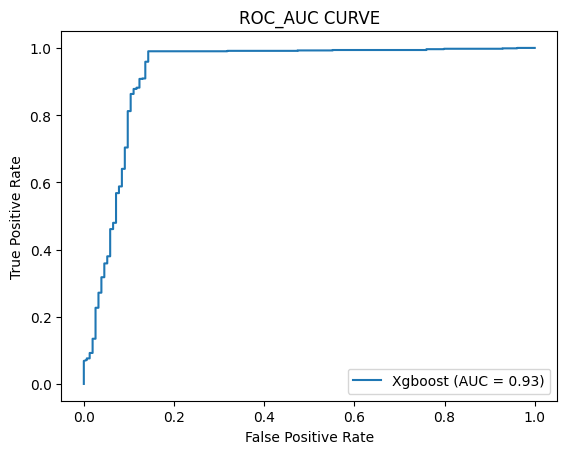

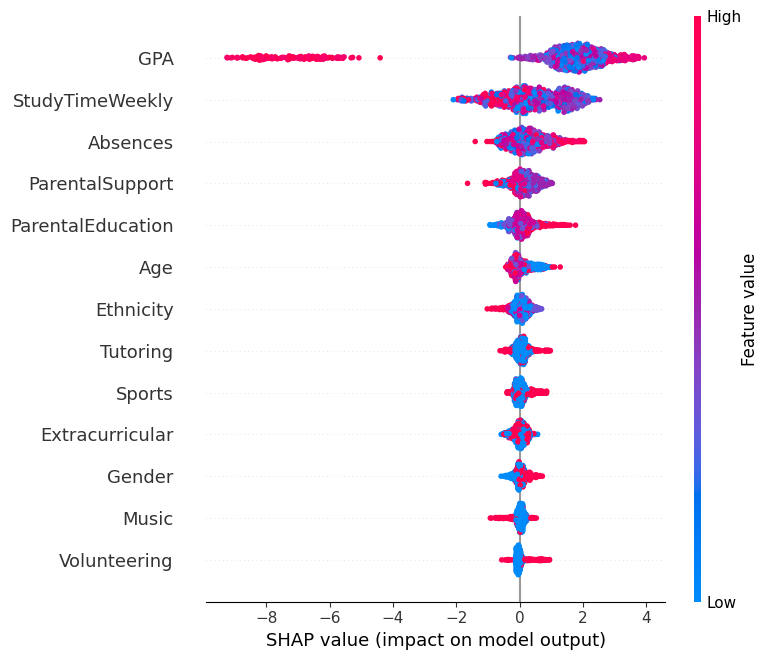

In [ ]:
import matplotlib.pyplot as plt

df['pass']=df['GradeClass'].apply(lambda x:1 if x >= 2 else 0)
X=df.drop(columns=['StudentID','GradeClass', 'pass'])
y=df['pass']
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=32,test_size=0.4)
model=XGBClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('Accuracy : ',accuracy_score(y_test,y_pred))
print('Precision : ',precision_score(y_test,y_pred))
print('Recall : ',recall_score(y_test,y_pred))
print('F1 Score : ',f1_score(y_test,y_pred))

#roc_auc_curve
y_pred_proba=model.predict_proba(X_test)[:,1]
fpr,tpr,_=roc_curve(y_test,y_pred_proba)

auc=roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label=f'Xgboost (AUC = {auc :.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC CURVE')
plt.legend()
plt.show()


import shap
explainer=shap.TreeExplainer(model)
shap_values=explainer.shap_values(X_test)
shap.summary_plot(shap_values,X_test)

sample_idx=5
shap.initjs()
shap.force_plot(explainer.expected_value,shap_values[sample_idx],X_test.iloc[sample_idx])

Accuracy: 0.9686520376175548
Precision: 0.9730722154222766
Recall: 0.9900373599003736
F1 Score: 0.9814814814814815


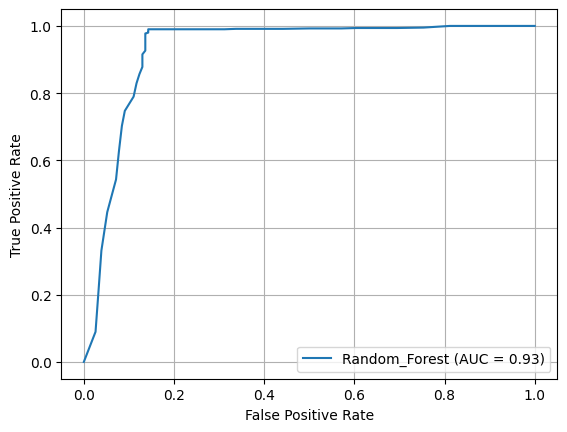

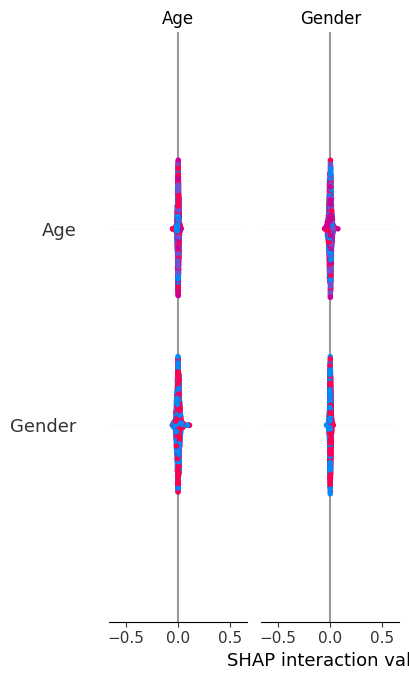

TypeError: In v0.20, force plot now requires the base value as the first parameter! Try shap.plots.force(explainer.expected_value, shap_values) or for multi-output models try shap.plots.force(explainer.expected_value[0], shap_values[..., 0]).

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,roc_auc_score,accuracy_score,precision_score,f1_score,recall_score
from sklearn.ensemble import RandomForestClassifier

df=pd.read_csv("/content/Student_performance_data.csv")
df['Pass']=df['GradeClass'].apply(lambda x:1 if x >= 2 else 0)
X=df.drop(columns=['StudentID','GradeClass','Pass'])
y=df['Pass']
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=32,test_size=0.4)
model=RandomForestClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('Accuracy:',accuracy_score(y_test,y_pred))
print('Precision:',precision_score(y_test,y_pred))
print('Recall:',recall_score(y_test,y_pred))
print('F1 Score:',f1_score(y_test,y_pred))

#ROC_AUC CURVE
y_pred_proba=model.predict_proba(X_test)[:,1]
fpr,tpr,_=roc_curve(y_test,y_pred_proba)

auc=roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label=f'Random_Forest (AUC = {auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()

import shap
explainer=shap.TreeExplainer(model)
shap_values=explainer.shap_values(X_test)
shap.summary_plot(shap_values,X_test)

sample_idx=5
shap.initjs()
shap.force_plot(explainer.expected_value,shap_values[sample_idx],X_test.iloc[sample_idx])



Accuracy :  0.9090909090909091
Precision : 0.958974358974359
Recall :  0.9315068493150684
F1 score:  0.9450410612760581


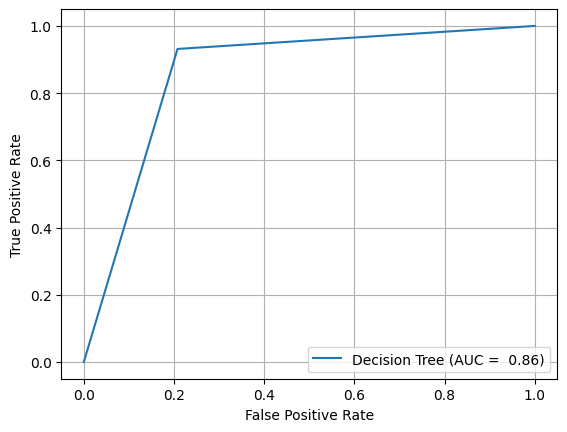

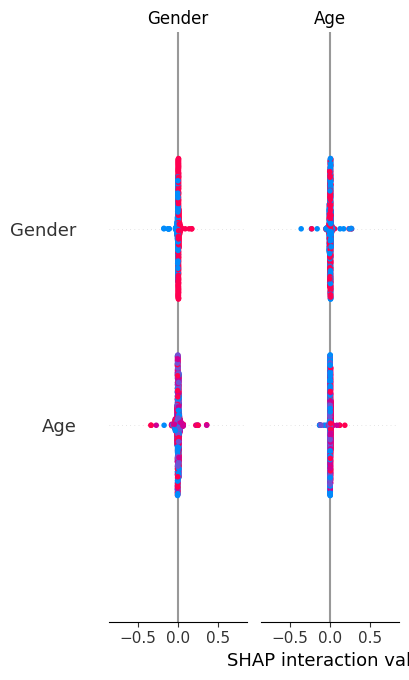

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,roc_auc_score,accuracy_score,precision_score,recall_score,f1_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

df=pd.read_csv("/content/Student_performance_data.csv")
df['Pass']=df['GradeClass'].apply(lambda x:1 if x >=2 else 0)
X=df.drop(columns=['StudentID','GradeClass','Pass'])
y=df['Pass']
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=32,test_size=0.4)
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('Accuracy : ',accuracy_score(y_test,y_pred))
print('Precision :',precision_score(y_test,y_pred))
print('Recall : ',recall_score(y_test,y_pred))
print('F1 score: ',f1_score(y_test,y_pred))

y_pred_proba=model.predict_proba(X_test)[:,1]
fpr,tpr,_=roc_curve(y_test,y_pred_proba)
auc=roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label=f'Decision Tree (AUC = {auc : .2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()

import shap
explainer=shap.TreeExplainer(model)
shap_values=explainer.shap_values(X_test)
shap.summary_plot(shap_values,X_test)



In [ ]:
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass,Pass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0,1
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0,0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0,1
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0,1
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0,1


In [ ]:
X_train.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA
1035,16,0,1,2,15.215186,6,1,4,1,1,0,0,3.539199
1215,15,1,0,1,1.792635,5,0,1,1,0,1,0,2.434532
1130,16,1,0,2,3.572578,14,1,2,1,1,0,0,2.051919
723,15,0,2,1,17.698535,14,0,3,1,1,0,1,2.668893
1547,17,0,0,2,7.770623,15,0,3,0,1,0,0,2.125091


In [ ]:
X_train.describe()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,16.455052,0.500348,0.865505,1.749826,9.634791,14.682230,0.309408,2.132404,0.383972,0.294774,0.202787,0.161672,1.891813
std,1.119701,0.500174,1.014897,1.015634,5.678613,8.409876,0.462411,1.126220,0.486521,0.456100,0.402216,0.368278,0.905433
min,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,0.000000,0.000000,1.000000,4.893319,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.185253
50%,16.000000,1.000000,0.000000,2.000000,9.356984,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.880065
75%,17.000000,1.000000,2.000000,2.000000,14.384828,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.595769
max,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [ ]:
X_test.describe()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA
count,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000
mean,16.489028,0.526646,0.895507,1.740857,9.977721,14.330199,0.289446,2.106583,0.382445,0.316614,0.188088,0.150470,1.927739
std,1.130194,0.499551,1.048784,0.977644,5.610479,8.553038,0.453742,1.118094,0.486239,0.465399,0.390987,0.357719,0.929604
min,15.000000,0.000000,0.000000,0.000000,0.004859,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,0.000000,0.000000,1.000000,5.180703,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.165394
50%,17.000000,1.000000,0.000000,2.000000,10.195141,14.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.919956
75%,17.000000,1.000000,2.000000,2.000000,14.447470,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.708472
max,18.000000,1.000000,3.000000,4.000000,19.948459,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000
